In [19]:
# Your code for LP1 goes here
# Feel free to add cells below this for LP1
# Your code for LP1 goes here
import pandas as pd
import numpy as np
bankDataFrame=pd.read_csv('bank_clean.csv')
bankDataFrame

,Unnamed: 0,age,marital,default,balance,housing,loan,contact,day,month,...,management,retired,selfemployed,services,student,technician,unemployed,primary,secondary,tertiary
0,0,0.451613,0,1,-0.518096,0,0,1,0.866667,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0.370968,0,1,-0.417386,1,1,1,0.833333,0,...,1,0,0,0,0,0,0,0,0,1
2,2,0.096774,1,1,-0.368150,1,1,1,0.033333,1,...,0,0,0,0,1,0,0,0,1,0
3,3,0.483871,0,1,-0.332022,1,1,0,0.266667,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0.096774,1,1,-0.488043,0,1,1,0.733333,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,2246,0.161290,1,1,-0.331063,0,1,1,0.466667,1,...,0,0,1,0,0,0,0,0,0,1
2238,2247,0.580645,0,1,0.685634,1,1,1,0.333333,0,...,0,0,0,0,0,1,0,0,1,0
2239,2248,0.193548,1,1,-0.417386,0,1,1,0.466667,0,...,1,0,0,0,0,0,0,0,0,1
2240,2249,0.483871,0,1,0.431460,1,1,1,0.533333,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Initially scalling is doen on duration column. 
# After doing z-score normalization the duration values range changed to -1 to 1.
# I have cleaned the bank data and worked on it.

bankCluster=bankMarketing[["duration","campaign","pdays","previous"]]

kmean =KMeans(n_clusters=3)
label=kmean.fit_predict(bankCluster)
bankCluster["predict"]=label
# predict
bankCluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,duration,campaign,pdays,previous,predict
0,-0.560314,2.092004,-0.417772,-0.290286,2
1,-0.310969,4.439824,-0.417772,-0.290286,2
2,0.444510,-0.591219,1.433583,1.177731,1
3,-0.891534,0.750393,-0.417772,-0.290286,0
4,-0.046737,-0.591219,-0.417772,-0.290286,0
...,...,...,...,...,...
2237,-0.627302,0.750393,2.349199,5.092444,1
2238,-0.567757,-0.591219,-0.417772,-0.290286,0
2239,-0.288639,-0.255816,-0.417772,-0.290286,0
2240,-0.742671,-0.591219,-0.417772,-0.290286,0


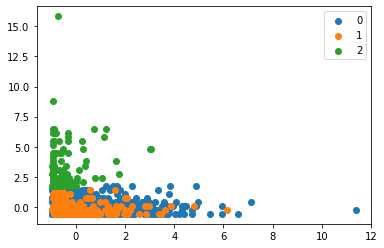

In [21]:
#Getting unique labels
 
u_labels = np.unique(label)
 
bankClusterArray = np.array(bankCluster) 
 
for i in u_labels:
    plt.scatter(bankClusterArray[label == i , 0] , bankClusterArray[label == i , 1] , label = i)
plt.legend()
plt.show()

In [22]:
# Your code for HP1 goes here
# Feel free to add cells below this for HP1
kmeans_range=range(1,10)
squaredErrorSum=[]
for kmeans in kmeans_range:
    KMEAN=KMeans(n_clusters=kmeans)
    KMEAN.fit(bankCluster)
    squaredErrorSum.append(KMEAN.inertia_)

In [23]:
squaredErrorSum

[9591.075825156111,
 6693.641022165044,
 5010.655836659971,
 3797.0557571624245,
 2930.1739390663734,
 2621.197293607489,
 2354.0107884169024,
 2109.715899907708,
 1872.9813419204786]

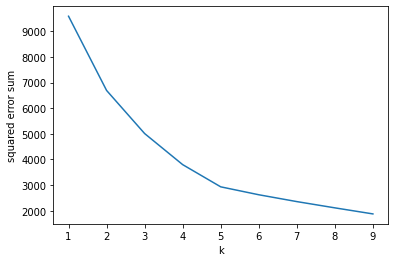

In [24]:
plt.xlabel('k')
plt.ylabel('squared error sum')
plt.plot(kmeans_range, squaredErrorSum)

From the graph we can observe we have got elbow at K=5.Therefor 5 is the best value for K.

[LP2]

Perform Principal Component Analysis (PCA) on the filtered dataset and extract the top two principal components.
Plot the principal components in a graph using appropriate labels on the x and y axes.

In [25]:
# Your code for LP2 goes here
# Feel free to add cells below this for LP2

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(bankCluster)
pcaData=pca.transform(bankCluster)
bankCluster.shape

(2242, 5)

In [26]:
pcaData.shape

(2242, 2)

In [27]:
pcaData

array([[-0.24858576,  2.51743737],
       [-0.42175658,  4.35269574],
       [ 2.02572423, -0.46830337],
       ...,
       [-0.5321158 , -0.15123535],
       [-0.51843303, -0.21650599],
       [ 3.32817928,  0.09576705]])

Text(0, 0.5, 'PC 2')

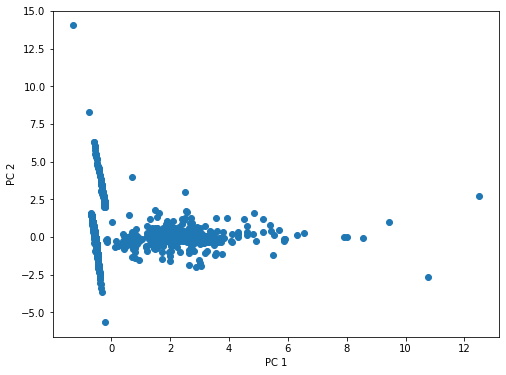

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

plt.figure(figsize=(8,6))
plt.scatter(pcaData[:,0],pcaData[:,1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")

[HP2] Did we lose information by picking only the top two principal components? How much information from the four columns in the filtered components are captured in the the two top principal components? Explain your thoughts briefly.

In [29]:
# Your code for HP2 goes here
# Feel free to add cells below this for HP2
pca.explained_variance_ratio_

array([0.3707352, 0.2654879])

37.07% of original data's variance can be seen in principal component 1. 26.54% of original data's variance can be seen in principal component 2.

We saved arround 37.3% of original data variance by using both PC1 and PC2 and lost arround 36.39% variance is lost. If we want to preserve variance we need to increase the number of principal components.